# Running PyPEMA

This notebook exemplifies how to run PyPEMA using an interactive environment such as IPython. PyPEMA computes the principal Elementary Modes, providing an Elementary Mode matrix (EM) and a matrix of flux states (X). PyPEMA also provides several vizualization tools to interpret the results. All these steps will be exemplified in this script.

Please consult the documentation for further details about the PEMA algorithm.

In [11]:
# PyPEMA modules required
from pema import pypema
from pema import plotfuncs
from pema import dataio

# Other required libraries
import numpy as np

In [6]:
# First, define the PyPEMA parameters
nrel = 5
nbranch = 3
maxPEMs = 10

In [7]:
# The input data should be a numpy 2D-array for the flux and elementary mode matrices (X and EM respectively). 
# PyPEMA includes an example MAT file containing both matrices in ./data/ecoli.mat. 
# The module dataio.py contains an utility that handles the conversion of X and EM to a numpy array.
datafile = './data/ecoli.mat'

# Convert the .mat file into the X and EM matrices
X, EM = dataio.load_matfile(datafile)

In [8]:
# To run PyPEMA, execute the function "run" in the pypema module.
# Inputs:
#   - X (ndarray): data matrix of measured flux distributions
#   - EM (ndarray): matrix of elementary modes for the metabolic network under analysis
#   - nrel (int): parameter regulating the number of branch points in the PEMA algorithm (see documentation for details)
#   - nbranch (int): parameter regulating the number of branch points in the PEMA algorithm (see documentation for details)
#   - maxPEMs (int): parameter regulating the maximum number of Principal Elementary Modes to be extracted from the data
#   - save_output (Boolean): if True, saves the output in ASCII format (default is False)
#
# Output:
#   - result (ndarray): a 2D-numpy array with the first column representing the percentage of explained variance for each
#                     set of extracted Principal Elementary Modes, with the following rows containing the index of a
#                     correspondent Principal Elementary Mode.
result = pypema.run(X, EM, nrel, nbranch, maxPEMs)


Running PEMA for 5 relaxations and 3 branch points


Progress: [#############################################################] 100%


Elapsed time is 50.5402047499997 seconds


# Plot functions

Several plotting functions were included in the plotfuncs module to aid in the analysis of the Principal Elementary Modes computed with PyPEMA. 

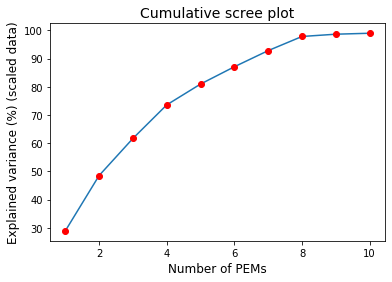

In [9]:
# The scree plot shows the percentage of explained variance in the data as function of the number of PEMs computed.
plotfuncs.scree_plot(result)

In [17]:
# Based on the information provided by the scree plot, a number of Principal Elementary Modes can be selected for
# a given degree of compression of the original data. We can pick any solution set of PEMs obtained with PyPEMA from
# the results array to construct several analysis plots. To select the PEMs set with the maximum explained variance:
PEM_list = np.int64(result[-1, 1:])

Degree of orthogonality: 0.6100055697155115


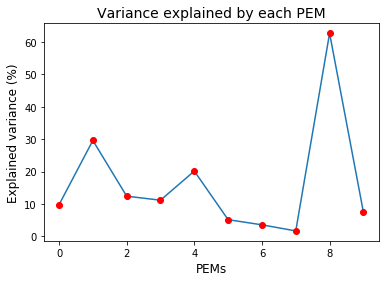

In [18]:
# Plot the PEM weights against the flux variables. This plot shows the explained variance for
# each individual PEM in the chosen solution. This function also computes the degree of orthogonality of the PEMs list
plotfuncs.weights_vars(X, EM, PEM_list)

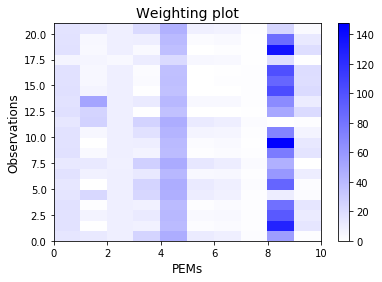

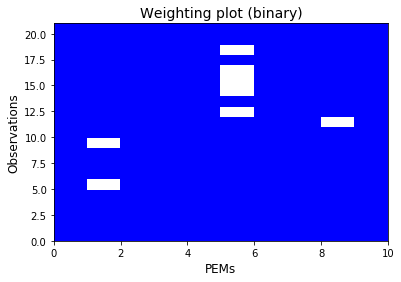

In [20]:
# Weights plot. The columns represent a PEM solution in PEM_list and the rows represent the scenarios in the flux data.
# Two plots are built here. The first represent the actual values of each PEM and the second a binary plot with a value
# of 1 for any nonzero value and 0 for zero values.
plotfuncs.weighting_plot(X, EM, PEM_list)

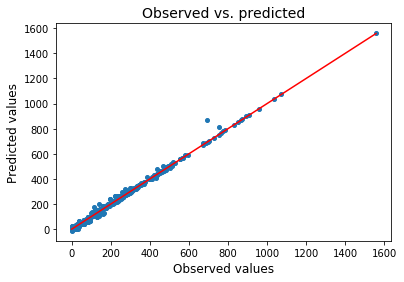

In [21]:
# Plot of observed fluxes vs predicted fluxes (recovered by the PEMs). This plot is an assessment of the accuracy of
# extracted PEMs to reconstruct the data set.
plotfuncs.obs_vs_pred(X, EM, PEM_list)

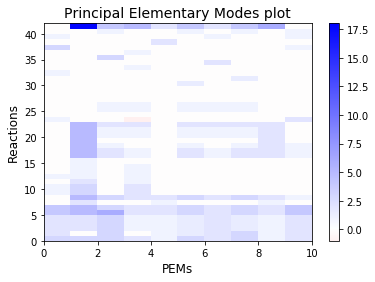

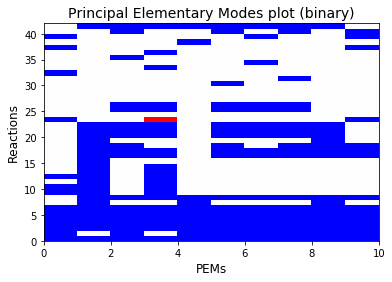

In [22]:
# PEM plots. The columns represent a solution of PEMs defined by the PEM_list. The rows represent the fluxes of the 
# metabolic network. A binary plot is also represented to emphasize zero and nonzero values. This is useful to assess,
# which reactions have metabolic activity.
plotfuncs.pem_plot(X, EM, PEM_list)

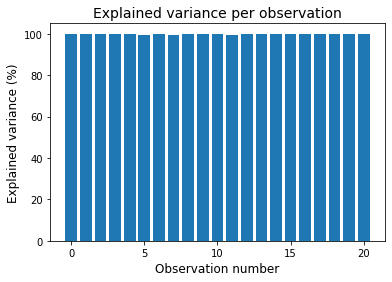

In [24]:
# Explained variance per observations plot. This plot shows the contribution of each data example for the 
# explained variance
plotfuncs.variance_obs(X, EM, PEM_list)